In [25]:
import time
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
import numpy as np
import itertools
import seaborn as sns

sys.path.insert(0, "../kNN_NBC/x64/Release")
import pynbc

# Performance test
100, 1000, 10000, 100000 - samples

2, 4, 8, 16, 32 - dimension

10 - k

In [11]:
def test_kNN(samples, dimension, k) :
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kNN(k, 0, dataset[0])
    end = time.time()
    return end - start;


In [9]:
def test_kpNN(samples, dimension, k) :
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kpNN(k, 0, dataset[0])
    end = time.time()
    return end - start;


In [33]:
samples = [100, 1000, 10000]
dims = [2, 4, 8, 16]
ks = [10]
params = list(itertools.product(samples, dims, ks))

In [34]:
results_kNN = [
    test_kNN(s, d, k) for s, d, k in params
]

In [35]:
list(zip(params, results_kNN))

[((100, 2, 10), 0.0),
 ((100, 4, 10), 0.0),
 ((100, 8, 10), 0.0009975433349609375),
 ((100, 16, 10), 0.001995086669921875),
 ((1000, 2, 10), 0.009985208511352539),
 ((1000, 4, 10), 0.022969484329223633),
 ((1000, 8, 10), 0.0449070930480957),
 ((1000, 16, 10), 0.08873605728149414),
 ((10000, 2, 10), 0.2184157371520996),
 ((10000, 4, 10), 1.2745611667633057),
 ((10000, 8, 10), 3.4976227283477783),
 ((10000, 16, 10), 7.8829567432403564)]

Text(33.0, 0.5, 'dimensions')

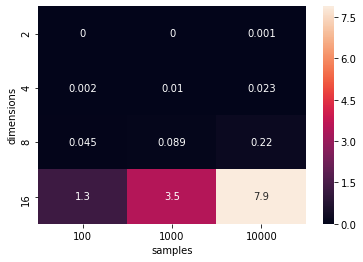

In [38]:
sns.heatmap(np.reshape(results_kNN, (len(dims), len(samples))), annot=True, xticklabels=samples, yticklabels=dims)
plt.xlabel('samples')
plt.ylabel('dimensions')